## Robust methods for Treatment of outliers in Regression Model

In [1]:
# Importing the basic Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Importing the sample data which is tailor-made data contains 5% outliers(visible)
df = pd.read_csv(r"D:\Project-VH_2\datasets\sample data.csv")

In [3]:
df.head(10)

,X,y
0,9.579643,-48.733866
1,9.827367,1.755741
2,11.169031,-11.932538
3,10.052881,-37.762739
4,10.096966,10.076298
5,11.286299,-6.470716
6,10.345687,-20.901430
7,9.051204,2.902513
8,9.484860,2.562670
9,9.665754,1.431622


In [4]:
# Collecting Response and Predictor and Reshaped according to syntax
X = np.array(df["X"]).reshape(500,1)
y = df["y"]

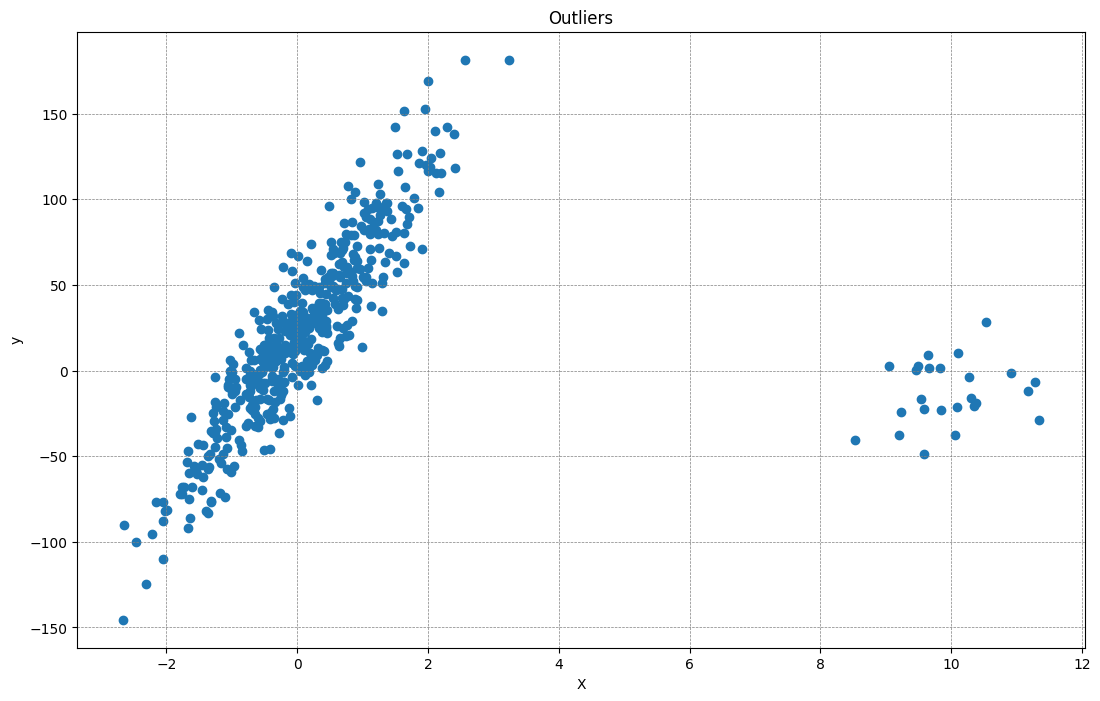

In [5]:
# Figure 1 --> Outliers
plt.figure(figsize=(13, 8))
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Outliers")
plt.show()

In [6]:
# Linear Regression : Method - OLS
# Robusr Regression methods - Huber Regression and RANSAC Regression  
from sklearn.linear_model import (LinearRegression, HuberRegressor, RANSACRegressor)

In [7]:
# Linear Regression --> Fitting
model_lm = LinearRegression().fit(X, y)
y_pred = model_lm.predict(X)

# Collecting Coefficients
coef_list = list()
coef_list.append(["linear_regression", model_lm.coef_[0]])

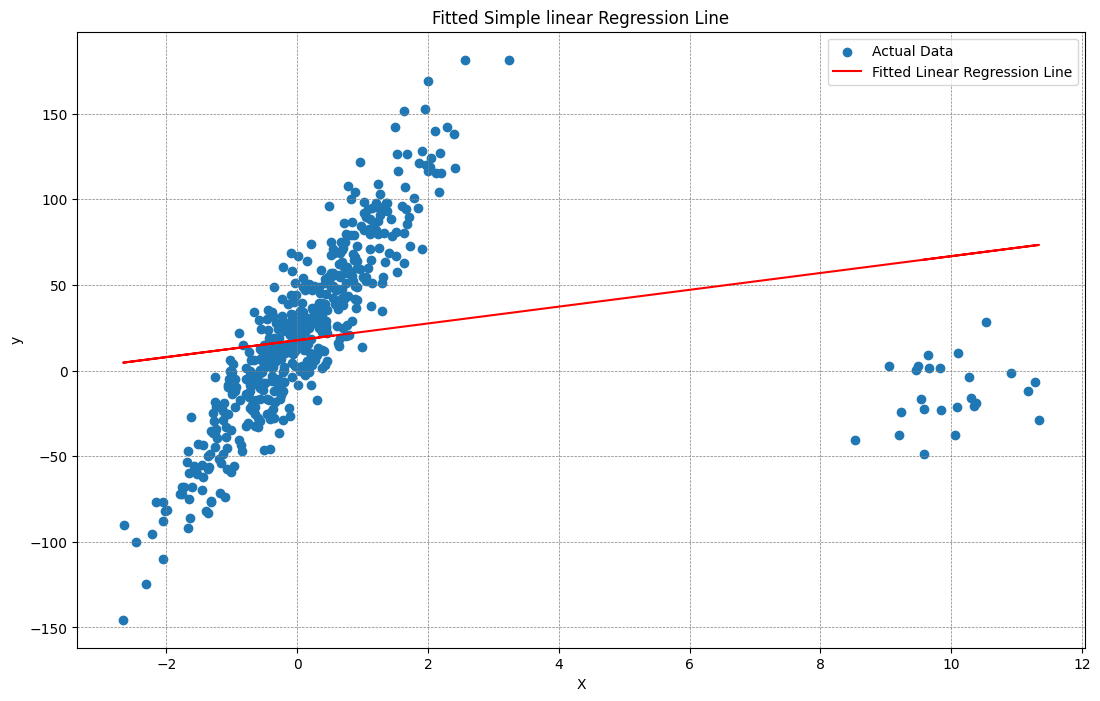

In [8]:
# Figure 2 --> Linear Regression (Fitted line vs Actual data)
plt.figure(figsize=(13, 8))
plt.grid(True) 
plt.grid(color='gray', linestyle='--', linewidth=0.5)
# Actual data
plt.scatter(X, y, label='Actual Data')
# Regression line
plt.plot(X, y_pred, color='red', label='Fitted Linear Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Fitted Simple linear Regression Line')
plt.legend()
plt.show()

In [9]:
# Huber Regression
model_huber = HuberRegressor().fit(X, y)
y_pred_hb = model_huber.predict(X)

# collecting Coefficients
coef_list.append(["huber_regression", model_huber.coef_[0]])

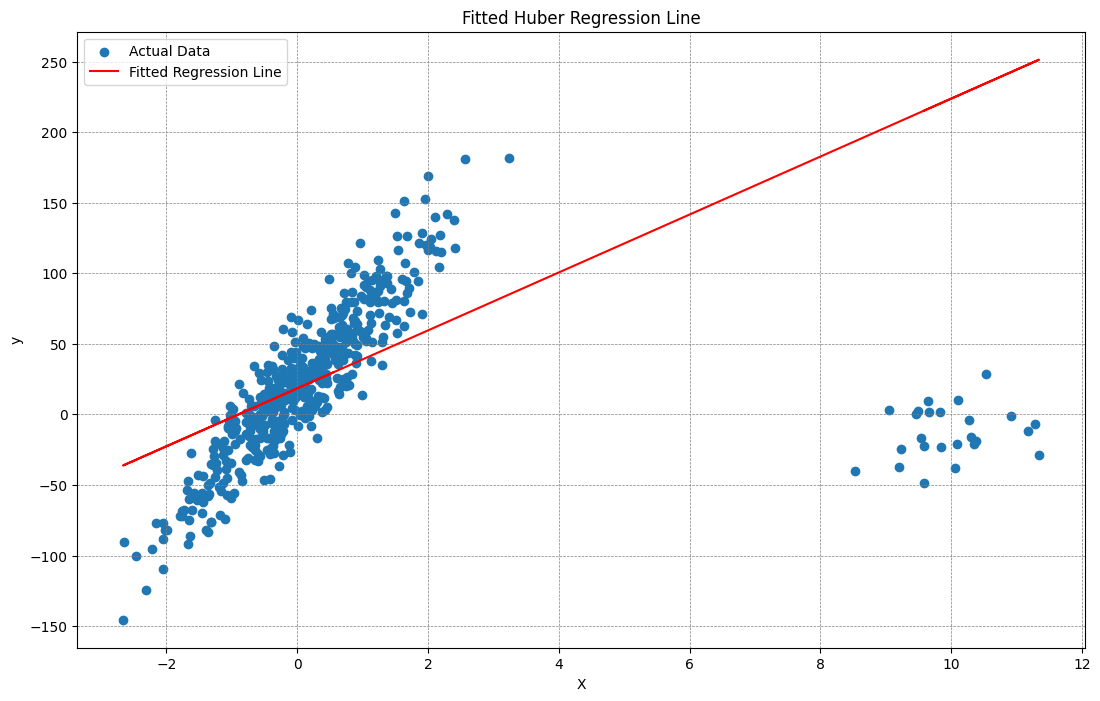

In [10]:
# Figure 3 --> Huber Regression (Fitted line vs Actual data)
plt.figure(figsize=(13, 8))
plt.grid(True) 
plt.grid(color='gray', linestyle='--', linewidth=0.5)
# Actual data
plt.scatter(X, y, label='Actual Data')
# Regression line
plt.plot(X, y_pred_hb, color='red', label='Fitted Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Fitted Huber Regression Line')
plt.legend()
plt.show()

In [11]:
# RANSAC Regression
model_ransac = RANSACRegressor().fit(X, y)
y_pred_ran = model_ransac.predict(X) 
# collecting coefficients
coef_list.append(["ransac_regression", model_ransac.estimator_.coef_[0]])

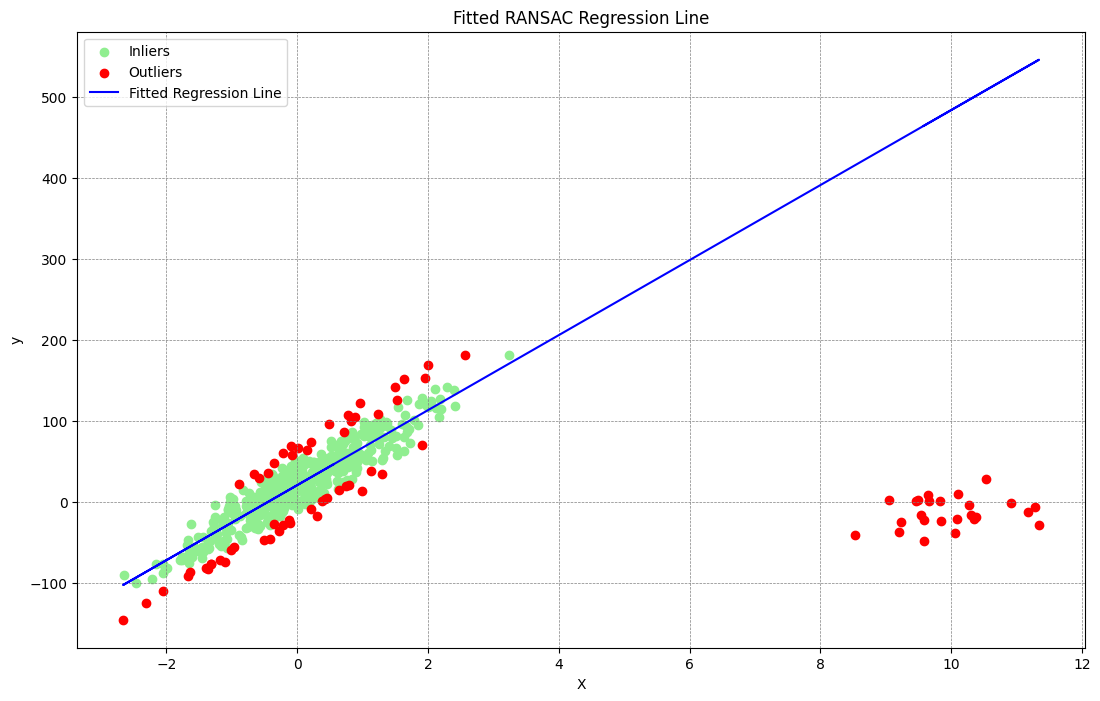

In [12]:
# Figure 4 --> RANSAC regression (Fitted line vs Actual data)
# Collecting inliers and outliers 
inlier = model_ransac.inlier_mask_
outlier = ~inlier

plt.figure(figsize=(13, 8))
plt.grid(True) 
plt.grid(color='gray', linestyle='--', linewidth=0.5)
# inliers
plt.scatter(X[inlier], y[inlier], color="lightgreen", label="Inliers")
# outliers
plt.scatter(X[outlier], y[outlier], color="red", label="Outliers")
# Regression line
plt.plot(X, y_pred_ran, color='Blue', label='Fitted Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Fitted RANSAC Regression Line')
plt.legend()
plt.show()

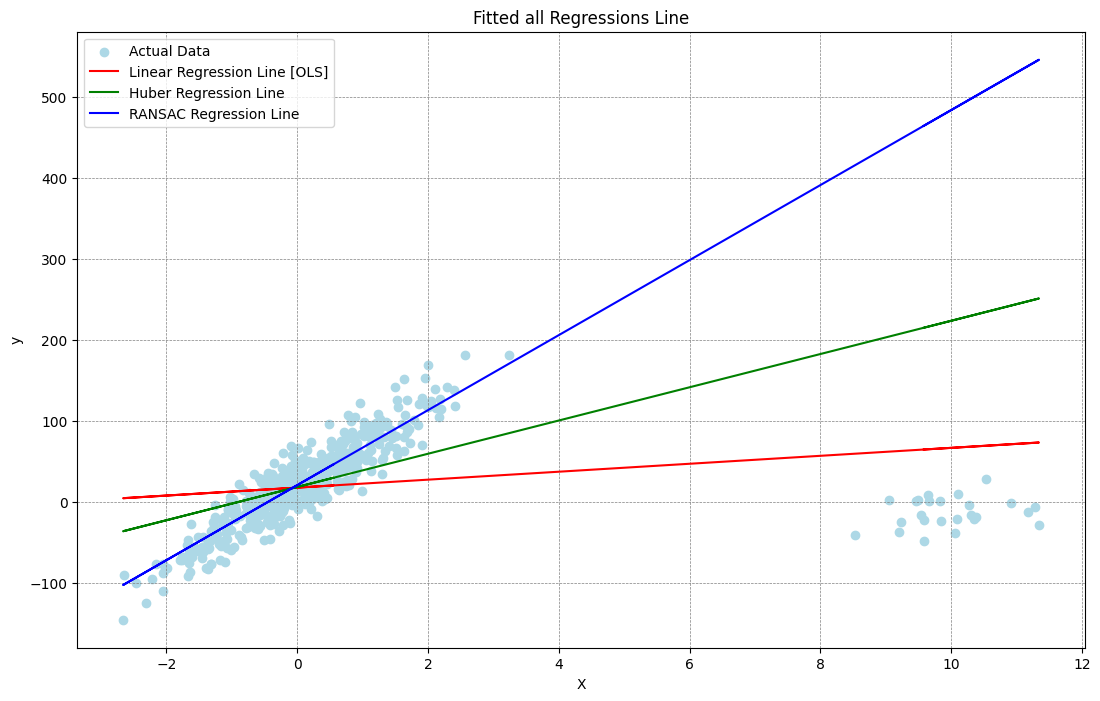

In [13]:
# Comparing All regression line and Concludes Best fit
plt.figure(figsize=(13, 8))
plt.grid(True) 
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Actual data
plt.scatter(X, y, label='Actual Data',color = "lightblue")

plt.plot(X, y_pred, color='red', label='Linear Regression Line [OLS]')
plt.plot(X, y_pred_hb, color='green', label='Huber Regression Line')
plt.plot(X, y_pred_ran, color='blue', label='RANSAC Regression Line')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Fitted all Regressions Line')
plt.legend()
plt.show()

In [14]:

# Comparing Coefficients
coef = pd.DataFrame(coef_list)
coef.columns = ["Regression","Coefficent"]



In [15]:
coef

,Regression,Coefficent
0,linear_regression,4.911829
1,huber_regression,20.533802
2,ransac_regression,46.337770


### Note :
#### From this above analysis , we can see how the presence of outliers influence the regression line and How Robust methods of assigning less weights to the outliers improves the model's fitness.  